# Data Science and Business Analytics Internship

# GRIP : The Sparks Foundation 

# Author : Atharv Bhilare

# Task 4 : Exploratory Data Analysis - Terrorism 

Q) As a security/defense analyst, try to find out the hot zone of terrorism. What all security issues and insights you can derive by EDA?

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the data set from locally saved
data = pd.read_csv("globalterrorismdb_0718dist.csv")
print("Data import successfuly")

Data import successfuly


In [3]:
# see the 1st 5  records in the data set
data.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [4]:
# see the no. of columns
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [5]:
#If all values are NA, drop that row or column.
data = data.dropna(how='all')
data.tail()

eventid  iyear  imonth  iday approxdate  extended resolution  \
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country  country_txt  region  ... addnotes  \
181686      182      Somalia      11  ...      NaN   
181687      200        Syria      10  ...      NaN   
181688      160  Philippines       5  ...      NaN   
181689       92        India       6  ...      NaN   
181690      160  Philippines       5  ...      NaN   

                                                   scite1  \
181686  "Somalia: Al-Shabaab Militants Attack Army Che...   
181687  "Putin's 'victory' in Syria has turned into a ...   
181688  "Maguindanao clashes trap tribe members," Phil...   
181689  "Trader escapes grenade attack in Imphal," Bus...   
181690  "Security tightened in Cotabato following IED ...   

                                                   scite2  \
181686  "Highlights: Somalia Daily Media Highlights 2 ...   
181687  "Two Russian soldiers killed at Hmeymim base i...   
181688                                                NaN   
181689                                                NaN   
181690  "Security tightened in Cotabato City," Manila ...   

                                                   scite3  \
181686  "Highlights: Somalia Daily Media Highlights 1 ...   
181687  "Two Russian servicemen killed in Syria mortar...   
181688                                                NaN   
181689                                                NaN   
181690                                                NaN   

                        dbsource  INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
181686  START Primary Collection        0         0        0       0      NaN  
181687  START Primary Collection       -9        -9        1       1      NaN  
181688  START Primary Collection        0         0        0       0      NaN  
181689  START Primary Collection       -9        -9        0      -9      NaN  
181690  START Primary Collection       -9        -9        0      -9      NaN  

[5 rows x 135 columns]

Choose Relevant Features only

In [6]:
df = data[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate', 'city', 'latitude', 
              'longitude', 'attacktype1_txt', 'targtype1_txt', 'gname', 'nkill', 'nwound', 
              'weaptype1_txt', 'success']]


In [7]:
# Rename the columns
df.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'country','region_txt':'region',
                   'provstate':'state','attacktype1_txt':'attack','targtype1_txt':'target','gname':'name',
                   'nkill':'kill','nwound':'wound','weaptype1_txt':'weapon'},inplace=True)
df.head()

year  month  day             country                       region    state  \
0  1970      7    2  Dominican Republic  Central America & Caribbean      NaN   
1  1970      0    0              Mexico                North America  Federal   
2  1970      1    0         Philippines               Southeast Asia   Tarlac   
3  1970      1    0              Greece               Western Europe   Attica   
4  1970      1    0               Japan                    East Asia  Fukouka   

            city   latitude   longitude                          attack  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

                        target                                name  kill  \
0  Private Citizens & Property                              MANO-D   1.0   
1      Government (Diplomatic)  23rd of September Communist League   0.0   
2          Journalists & Media                             Unknown   1.0   
3      Government (Diplomatic)                             Unknown   NaN   
4      Government (Diplomatic)                             Unknown   NaN   

   wound      weapon  success  
0    0.0     Unknown        1  
1    0.0     Unknown        1  
2    0.0     Unknown        1  
3    NaN  Explosives        1  
4    NaN  Incendiary        1

In [8]:
#check the shape 
df.shape

(181691, 16)

In [9]:
#check the Data-Type
df.dtypes

year           int64
month          int64
day            int64
country       object
region        object
state         object
city          object
latitude     float64
longitude    float64
attack        object
target        object
name          object
kill         float64
wound        float64
weapon        object
success        int64
dtype: object

In [10]:
#check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       181691 non-null  int64  
 1   month      181691 non-null  int64  
 2   day        181691 non-null  int64  
 3   country    181691 non-null  object 
 4   region     181691 non-null  object 
 5   state      181270 non-null  object 
 6   city       181257 non-null  object 
 7   latitude   177135 non-null  float64
 8   longitude  177134 non-null  float64
 9   attack     181691 non-null  object 
 10  target     181691 non-null  object 
 11  name       181691 non-null  object 
 12  kill       171378 non-null  float64
 13  wound      165380 non-null  float64
 14  weapon     181691 non-null  object 
 15  success    181691 non-null  int64  
dtypes: float64(4), int64(4), object(8)
memory usage: 23.6+ MB


Number Of Unique Values In Each Columns¶

In [11]:
df.nunique().sort_values(ascending=False)

latitude     48322
longitude    48039
city         36674
name          3537
state         2854
wound          238
country        205
kill           205
year            47
day             32
target          22
month           13
region          12
weapon          12
attack           9
success          2
dtype: int64

Missing Values

In [12]:
#check null or NA Values
df.isnull().sum().sort_values(ascending=False)

wound        16311
kill         10313
longitude     4557
latitude      4556
city           434
state          421
year             0
month            0
day              0
country          0
region           0
attack           0
target           0
name             0
weapon           0
success          0
dtype: int64

In [13]:
#checking the stats values of Numrical columns
df.describe()

year          month            day       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean     2002.638997       6.467277      15.505644      23.498343   
std        13.259430       3.388303       8.814045      18.569242   
min      1970.000000       0.000000       0.000000     -53.154613   
25%      1991.000000       4.000000       8.000000      11.510046   
50%      2009.000000       6.000000      15.000000      31.467463   
75%      2014.000000       9.000000      23.000000      34.685087   
max      2017.000000      12.000000      31.000000      74.633553   

          longitude           kill          wound        success  
count  1.771340e+05  171378.000000  165380.000000  181691.000000  
mean  -4.586957e+02       2.403272       3.167668       0.889598  
std    2.047790e+05      11.545741      35.949392       0.313391  
min   -8.618590e+07       0.000000       0.000000       0.000000  
25%    4.545640e+00       0.000000       0.000000       1.000000  
50%    4.324651e+01       0.000000       0.000000       1.000000  
75%    6.871033e+01       2.000000       2.000000       1.000000  
max    1.793667e+02    1570.000000    8191.000000       1.000000

Check Collinearity In Data


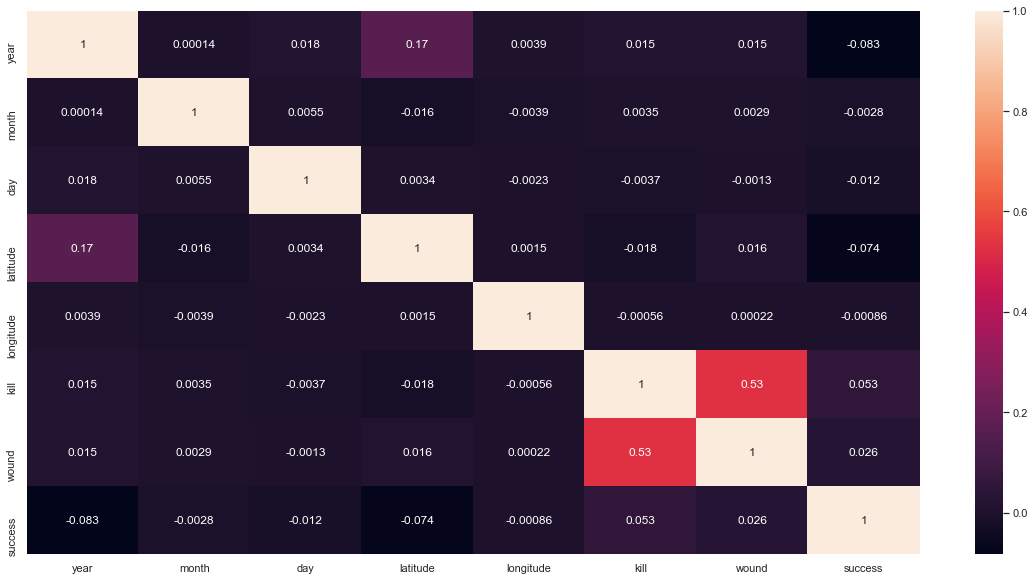

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

There is no collinearity between any features

Total Number Of Attacks Each Year (1970-2017)

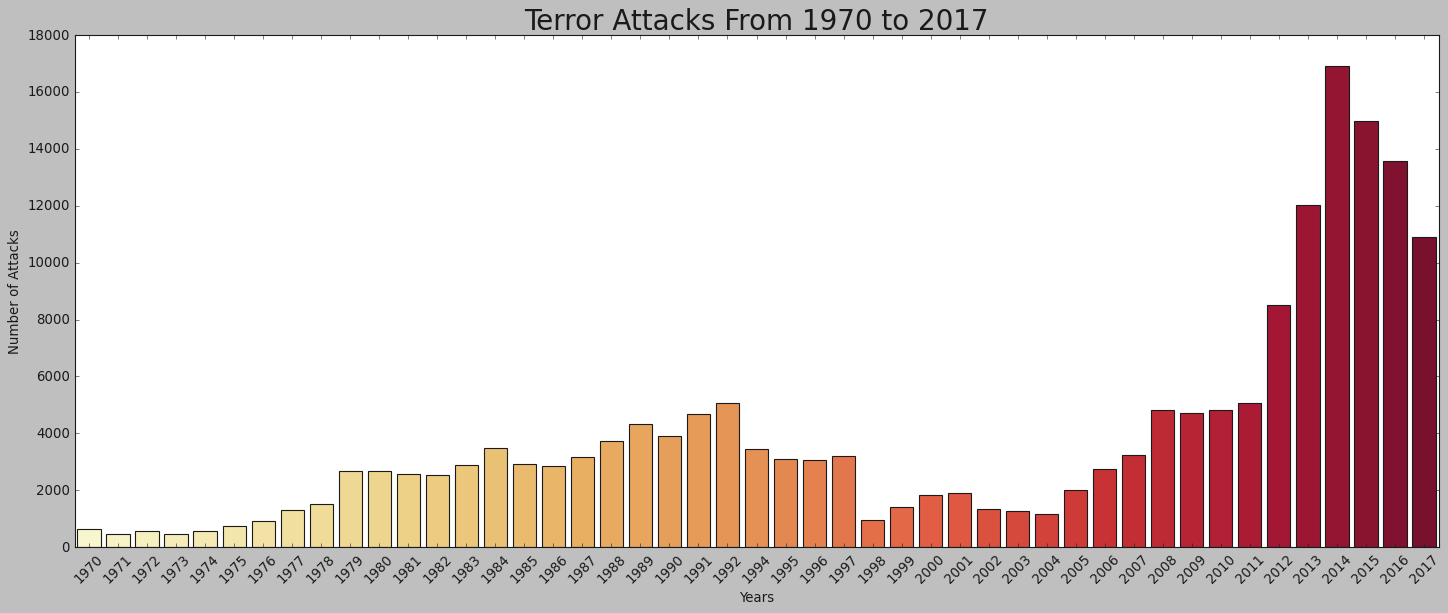

In [15]:
plt.style.use('classic')
plt.figure(figsize = (22,8))
sns.countplot(x='year',palette="YlOrRd", data=df)
plt.xticks(rotation= 45)
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.title("Terror Attacks From 1970 to 2017", size=25)
plt.show()

2014 had highest attacks, i.e., total 16903
We can see that between 1970 to 1978 the Terror Attacks are less but after 1978 it's increasing number of Attacks In 2012 to 2017 years between the Most Terror Attack done so We can say Security of countries is not good enough

Successful & Unsuccessful Attacks (1970-2017)

1    161632
0     20059
Name: success, dtype: int64


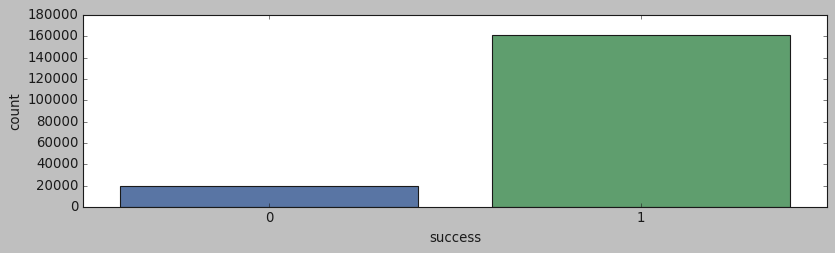

In [16]:
#Total Number Of Attacks From 1970 to 2017
plt.figure(figsize = (12,3))
sns.countplot(x = df.success)
print(df['success'].value_counts())
plt.show()

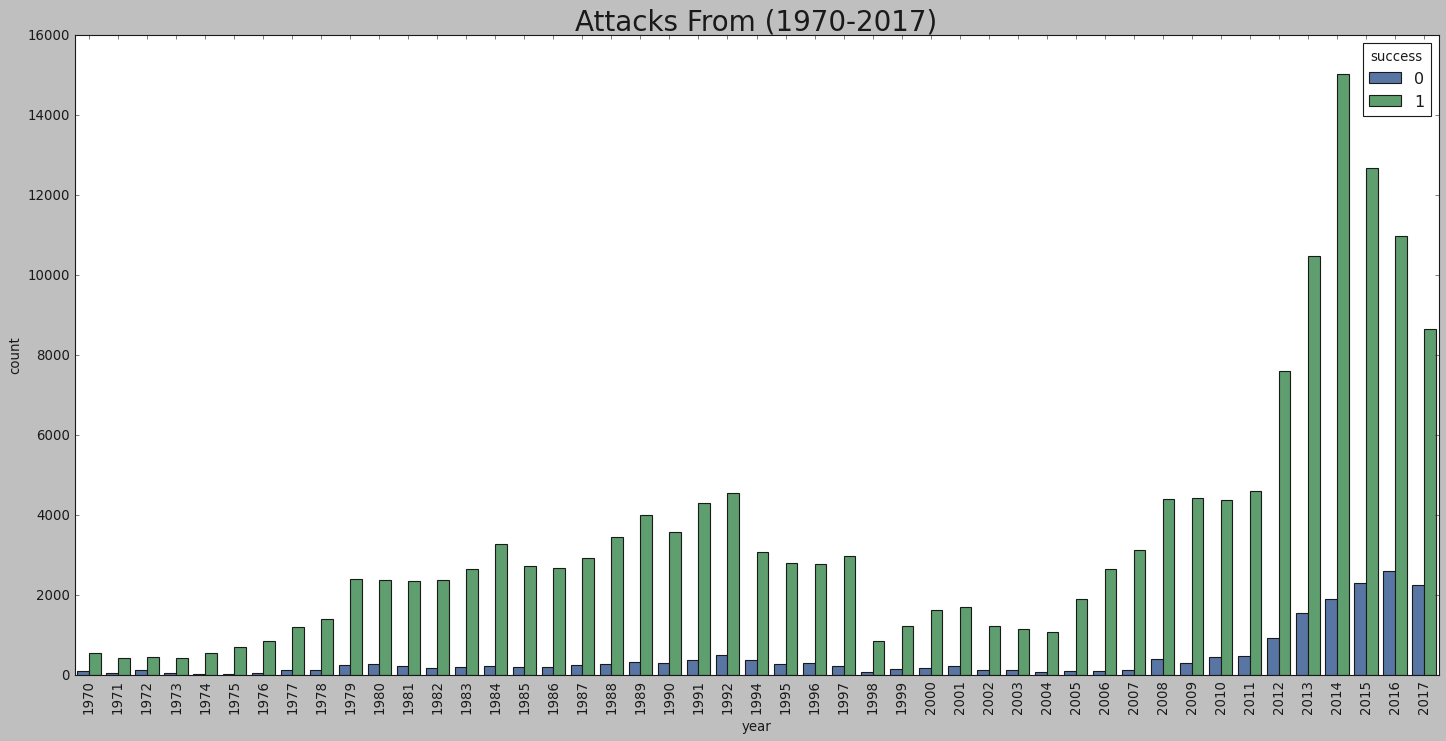

In [17]:
# Successful & Unsuccessful Attacks (1970-2017)
plt.figure(figsize=(22,10))
plt.xticks(rotation=90)
sns.countplot(x='year', hue='success', data=df)
plt.title('Attacks From (1970-2017)', size=25)
plt.show()

2014 had total of 15015 successful attacks.

Most Attacked Regions (In The World)

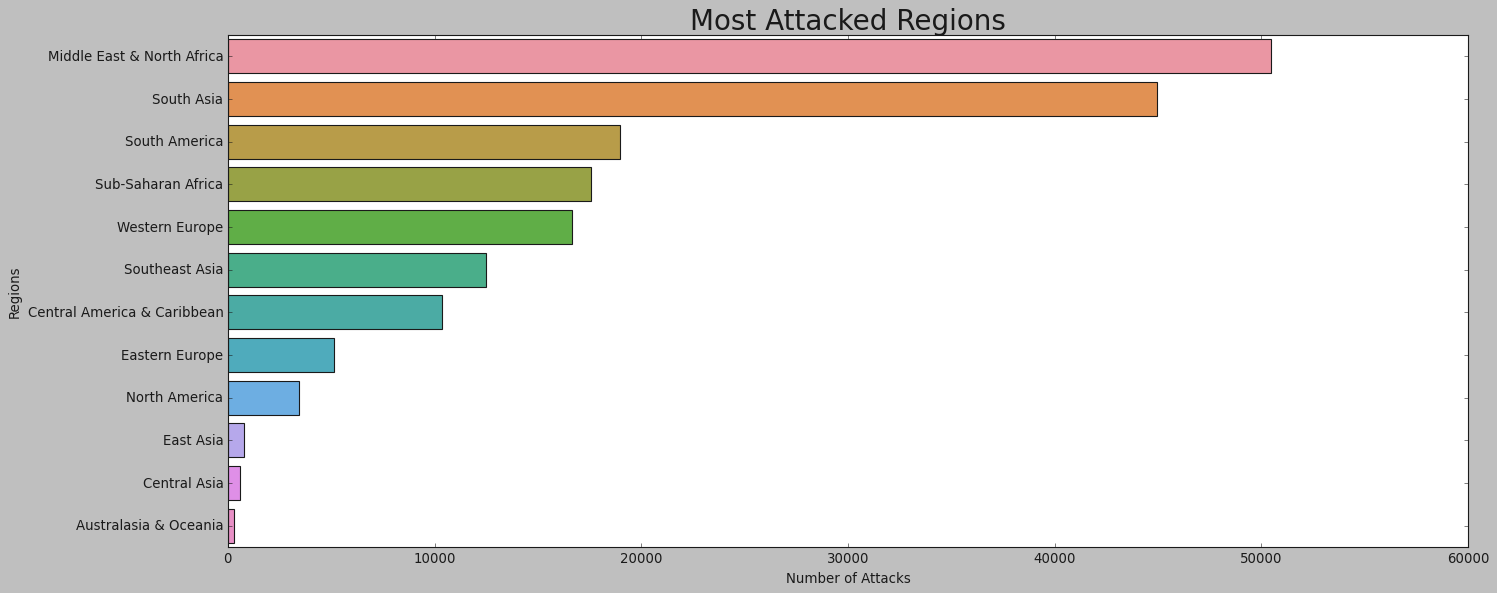

In [18]:
plt.figure(figsize = (20,8))
sns.barplot(y=df['region'].value_counts().index, x=df['region'].value_counts().values)
plt.title('Most Attacked Regions',size=25)
plt.xlabel('Number of Attacks')
plt.ylabel('Regions')
plt.show()


Middle East And North Africa are most terrorist affected areas in the World.

Most Attacked Countries (In The World)

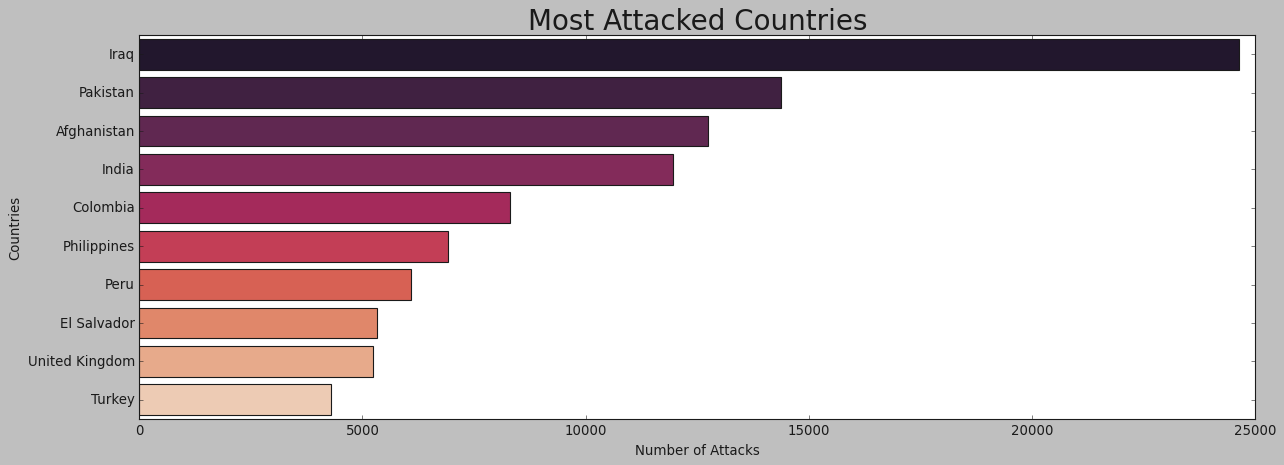

In [19]:
plt.figure(figsize = (18,6))
sns.barplot(y=df['country'].value_counts()[:10].index, x=df['country'].value_counts()[:10].values, palette='rocket' ) #Top 10
plt.title('Most Attacked Countries',size=25)
plt.xlabel('Number of Attacks')
plt.ylabel('Countries')
plt.show()

Iraq had 24636 Terrorist attacks since 1970.

Most Attacked Province/State

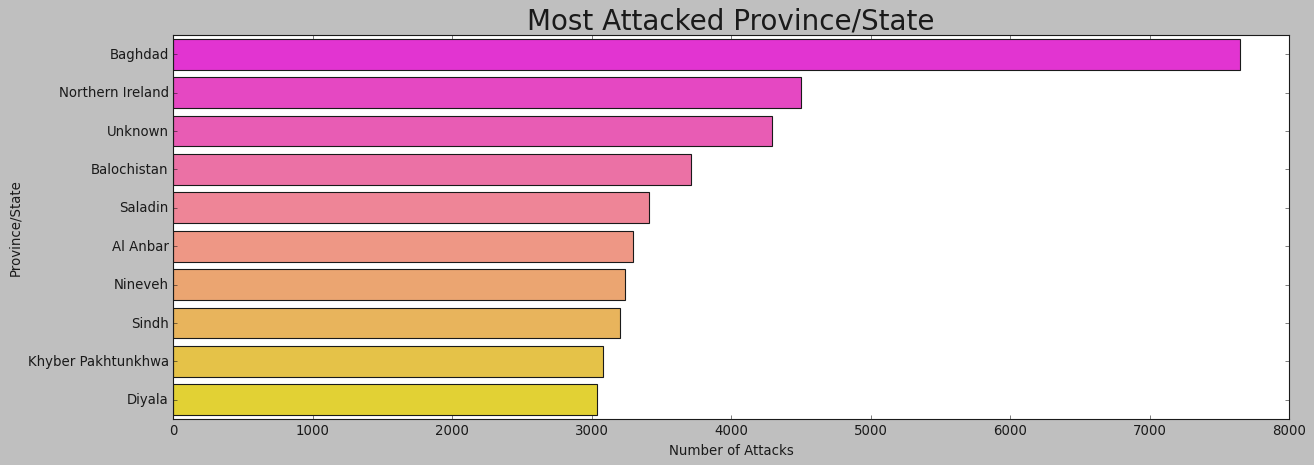

In [20]:
plt.figure(figsize = (18,6))
sns.barplot(y=df['state'].value_counts()[:10].index, x=df['state'].value_counts()[:10].values, palette='spring' ) #Top 10
plt.title('Most Attacked Province/State',size=25)
plt.xlabel('Number of Attacks')
plt.ylabel('Province/State')
plt.show()

Baghdad- cpital state of Iraq, is the most affected city in the world with 7645 attacks since 1970.

Most Attacked Cities

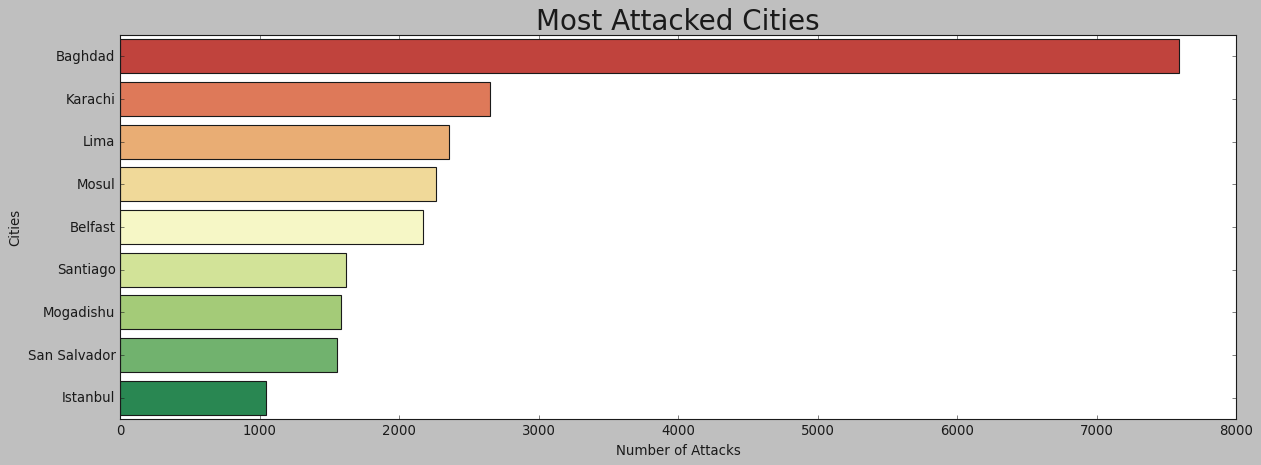

In [21]:
plt.figure(figsize = (18,6))
sns.barplot(y=df['city'].value_counts()[1:10].index, x=df['city'].value_counts()[1:10].values,palette='RdYlGn' ) #Top 10
plt.title('Most Attacked Cities',size=25)
plt.xlabel('Number of Attacks')
plt.ylabel('Cities')
plt.show()

Baghdad suffered 7589 terrorist attacks since 1970.

Attack Types

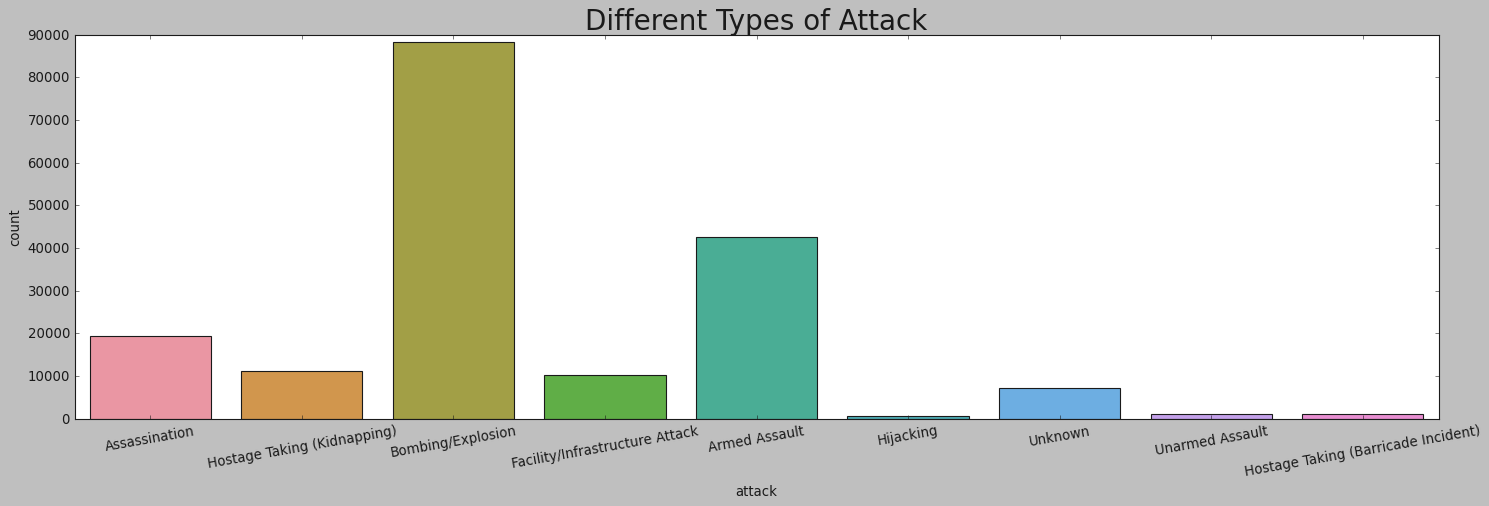

In [22]:
plt.figure(figsize=(22,6))
sns.countplot(df['attack'])
plt.title('Different Types of Attack',size=25)
plt.xticks(rotation=10)
plt.show()

There has been 88255 attacks executed using Bombing/Explosion since 1970.

Targets

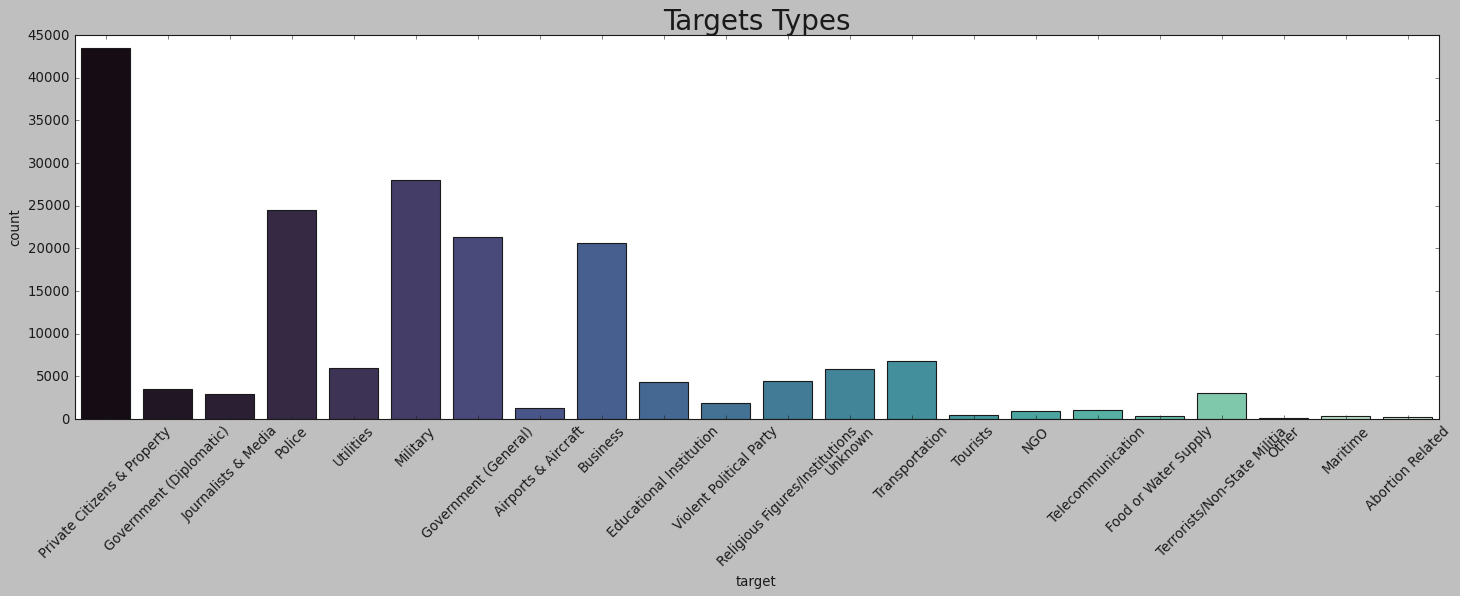

In [23]:
plt.figure(figsize=(22,6))
sns.countplot(df['target'],palette='mako')
plt.title('Targets Types',size=25)
plt.xticks(rotation=45)
plt.show()

"Private Citizens & Property" are most targeted by Terrorrist.

Top 10 Terrorist Groups

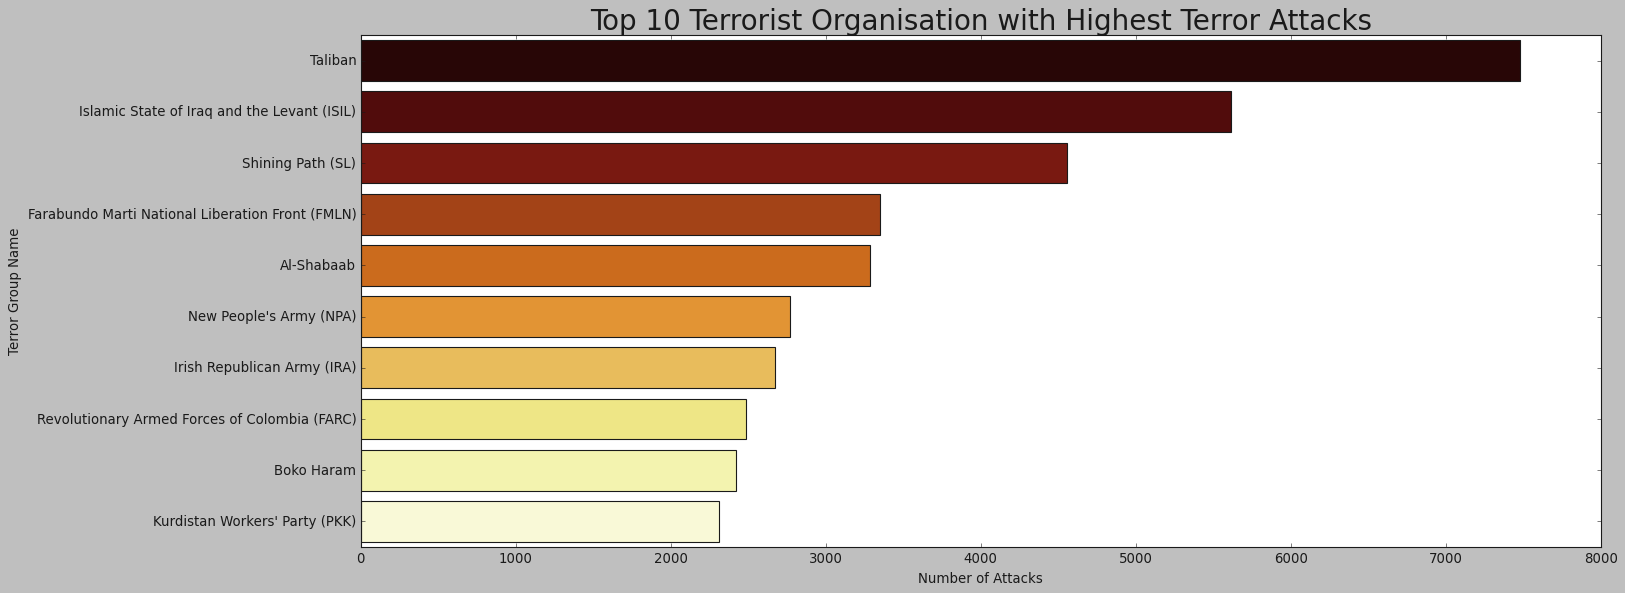

In [24]:
plt.figure(figsize = (20,8))
sns.barplot(x = df['name'].value_counts()[1:11].values, y = df['name'].value_counts()[1:11].index,palette='afmhot')
plt.title('Top 10 Terrorist Organisation with Highest Terror Attacks',size=25)
plt.ylabel('Terror Group Name')
plt.xlabel('Number of Attacks')
plt.show()

With 7478 number of attacks since 1970, Taliban is the most active terrorist group.

Number of people killed Region wise, Country wise, State wise

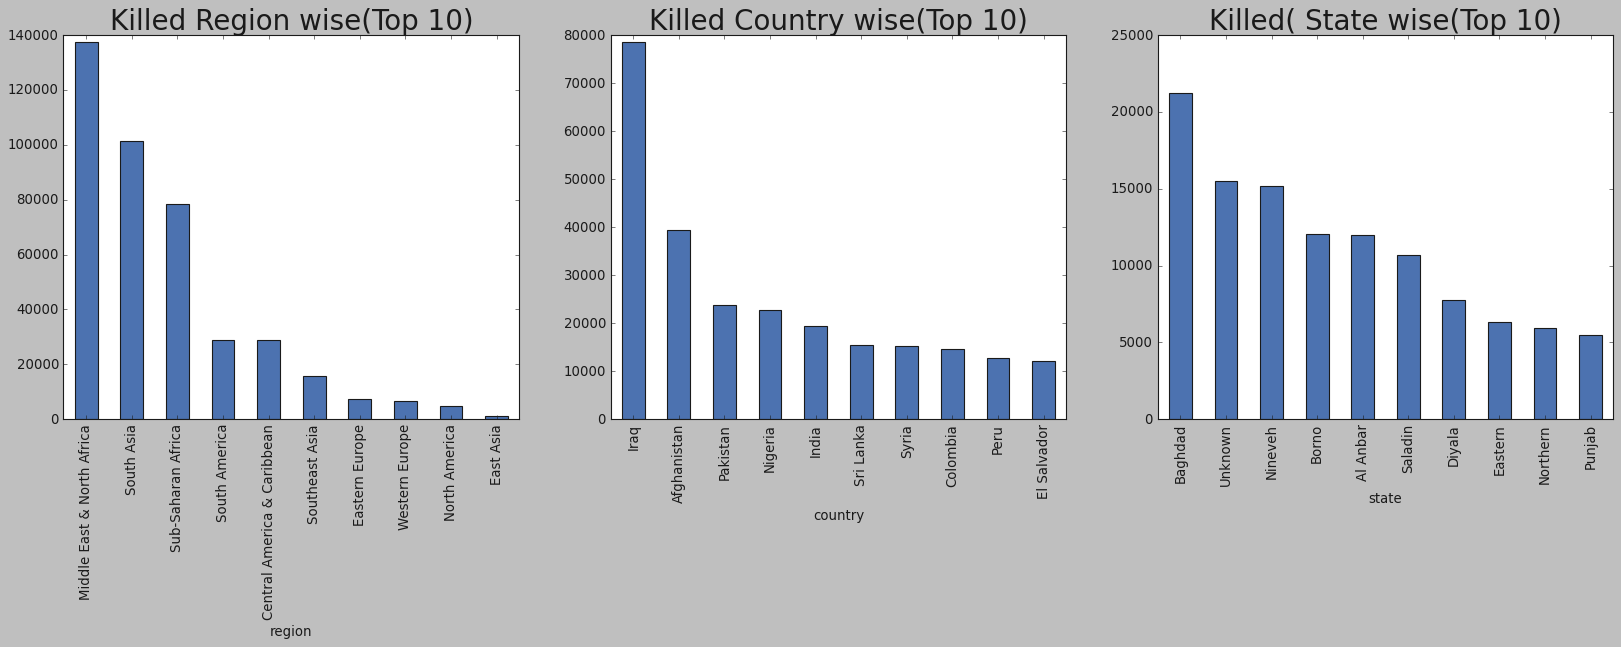

In [25]:
plt.figure(figsize = (25,6))
plt.subplot(131)
df.groupby('region')['kill'].sum().sort_values(ascending = False).head(10).plot(kind='bar') # Top 10 region
plt.xticks(rotation=90)
plt.title("Killed Region wise(Top 10)",size=25)
plt.subplot(132)
df.groupby('country')['kill'].sum().sort_values(ascending = False).head(10).plot(kind='bar') # Top 10 Country
plt.xticks(rotation=90)
plt.title("Killed Country wise(Top 10)",size=25)
plt.subplot(133)
df.groupby('state')['kill'].sum().sort_values(ascending = False).head(10).plot(kind='bar') # Top 10 State
plt.xticks(rotation=90)
plt.title("Killed( State wise(Top 10)",size=25)
plt.show()


In Middle East & North Africa Maximum people were killed
In Iraq Maximum people were killed
In Baghdad Maximum people were killed

Number of people wounded Region wise, Country wise, State wise

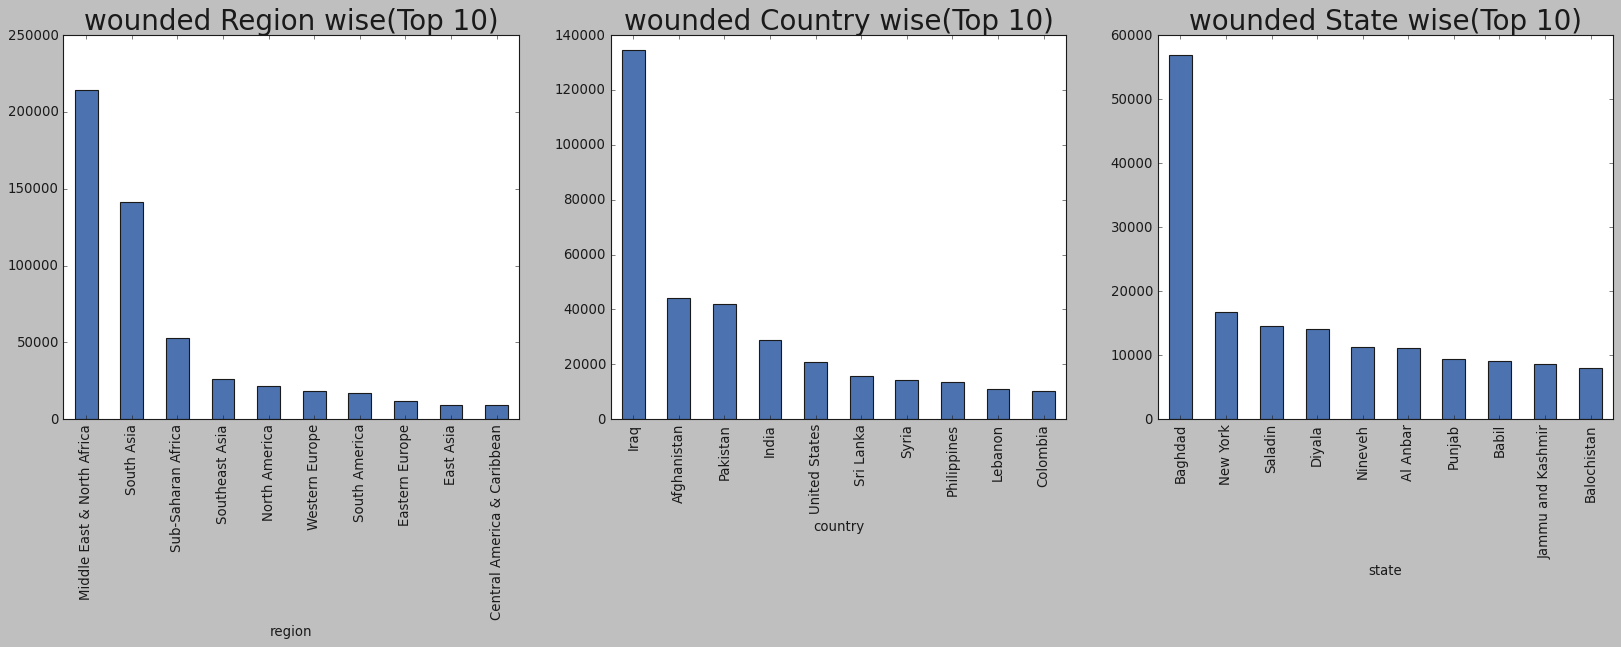

In [26]:
plt.figure(figsize = (25,6))
plt.subplot(131)
df.groupby('region')['wound'].sum().sort_values(ascending = False).head(10).plot(kind='bar') # Top 10 region
plt.xticks(rotation=90)
plt.title("wounded Region wise(Top 10)",size=25)
plt.subplot(132)
df.groupby('country')['wound'].sum().sort_values(ascending = False).head(10).plot(kind='bar') # Top 10 Country
plt.xticks(rotation=90)
plt.title("wounded Country wise(Top 10)",size=25)
plt.subplot(133)
df.groupby('state')['wound'].sum().sort_values(ascending = False).head(10).plot(kind='bar') # Top 10 State
plt.xticks(rotation=90)
plt.title("wounded State wise(Top 10)",size=25)
plt.show()

In Middle East & North Africa Maximum people were killed
In Iraq Maximum people were killed
In Baghdad Maximum people were killed

Most Weapons Used In Attacks

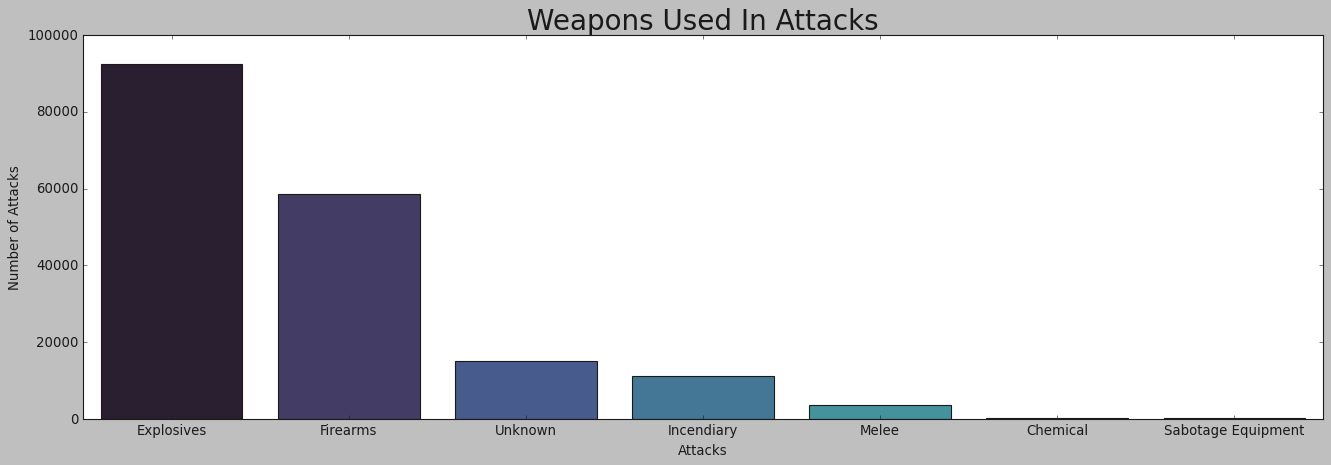

In [27]:
plt.figure(figsize = (20,6))
sns.barplot(x=df['weapon'].value_counts()[:7].index, y=df['weapon'].value_counts()[:7].values,palette='mako' ) # Top 7
plt.title('Weapons Used In Attacks',size=25)
plt.xlabel('Attacks')
plt.ylabel('Number of Attacks')
#plt.xticks(rotation= 45)
plt.show()

There has been 1966 explosive attacks on average every year since 1970.

Attacks Throughout Globe (1970-2017)

In [28]:
import plotly.express as px
country=df.groupby(['country'], as_index=False).count()
fig = px.choropleth(country, locations='country', locationmode='country names',color='year', hover_name='country', 
                    projection='orthographic',title='Total Number Of Attacks (1970-2017)', labels={'year':'Attacks'}, 
                    width=750, height=750)
fig.show()

CONCLUSION
 1. Most Number of Terror Attacks : In the last decade(Year 2014) Approx. 17000 attacks in one year
 2. Highest Terrorist Attacks (in Region) : Middle East & North Africa
 3. Highest Terrorist Attacks (in Country) : Iraq
 4. Most Terrorist Attacks (Types) : Bombing/Explosion
 5. Most Terrorist Attacks (Group Name) : Taliban
 6. Most Attacked Targets : Private Citizens and Propertye


 Thank You...